# Comprehensive Metrics Evaluation

## All Models Comparison with Advanced Metrics

**Purpose:**
- Load all 3 trained models
- Calculate 10+ evaluation metrics
- Generate ALL required graphs for assignment
- Create comparison tables
- Statistical significance testing

**Assignment Criterion:** Model Performance & Metrics (20%)

**Models:**
1. Model 1: CNN Baseline (no augmentation)
2. Model 3: CNN-LSTM (with augmentation)
3. Enhanced: CNN-LSTM with Attention

In [22]:
# Load utilities
%run 00_utils_and_config.ipynb

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve, average_precision_score,
    matthews_corrcoef, cohen_kappa_score, confusion_matrix
)
from scipy import stats
import pandas as pd
import seaborn as sns

# Create output directory
eval_dir = CONFIG['results_path'] / 'comprehensive_evaluation'
eval_dir.mkdir(exist_ok=True)

print("✓ Comprehensive evaluation setup complete")

PyTorch version: 2.9.1+cu130
CUDA available: True
CUDA version: 13.0
GPU: NVIDIA GeForce RTX 3060 Laptop GPU
Device: cuda
Configuration loaded successfully!

Base path: C:\Users\rishi\CV_Assignment\Paper2
Raw data path: C:\Users\rishi\CV_Assignment\Paper2\Raw_Data
Number of models: 5
Data processing functions loaded successfully!
Evaluation metrics functions loaded successfully!
Visualization functions loaded successfully!
Data augmentation setup loaded successfully!

PAPER 2 UTILITIES AND CONFIGURATION - SUMMARY

✓ All libraries imported successfully
✓ Configuration parameters loaded
✓ Data processing functions defined
✓ Evaluation metrics functions defined
✓ Visualization functions defined
✓ Data augmentation configured

Ready to proceed with:
  - Notebook 01: Data Preparation
  - Notebooks 02-06: Model Implementations
  - Notebook 07: Results Comparison

✓ Comprehensive evaluation setup complete


In [23]:
# Clear GPU memory from previous runs
import gc
gc.collect()
torch.cuda.empty_cache()

# Check GPU memory
if torch.cuda.is_available():
    print(f"GPU Memory Before: {torch.cuda.memory_allocated()/1024**2:.1f} MB allocated")
    print(f"GPU Memory Reserved: {torch.cuda.memory_reserved()/1024**2:.1f} MB reserved")
    print("✓ GPU memory cleared")

GPU Memory Before: 11.0 MB allocated
GPU Memory Reserved: 74.0 MB reserved
✓ GPU memory cleared


## 1. Load All Models and Results

In [24]:
# Load saved results
import json

results_model1 = json.load(open(CONFIG['results_path'] / 'model1_results.json'))
results_model3 = json.load(open(CONFIG['results_path'] / 'model3_results.json'))

# Try to load enhanced model results
try:
    results_enhanced = json.load(open(CONFIG['results_path'] / 'enhanced_model_results.json'))
    has_enhanced = True
except FileNotFoundError:
    print("⚠ Enhanced model results not found. Run notebook 08 first.")
    has_enhanced = False

print("Loaded results:")
print(f"  ✓ Model 1 (CNN): {results_model1['accuracy']*100:.2f}% accuracy")
print(f"  ✓ Model 3 (CNN-LSTM): {results_model3['accuracy']*100:.2f}% accuracy")
if has_enhanced:
    print(f"  ✓ Enhanced Model: {results_enhanced['accuracy']*100:.2f}% accuracy")

Loaded results:
  ✓ Model 1 (CNN): 98.35% accuracy
  ✓ Model 3 (CNN-LSTM): 98.72% accuracy
  ✓ Enhanced Model: 98.26% accuracy


## 2. Calculate Advanced Metrics

Beyond basic metrics, we calculate:
- **MCC** (Matthews Correlation Coefficient) - Better for imbalanced data
- **Cohen's Kappa** - Inter-rater agreement
- **AP** (Average Precision) - Area under PR curve
- **Balanced Accuracy** - Average of recall for each class

In [25]:
def calculate_advanced_metrics(y_true, y_pred, y_pred_proba):
    """
    Calculate comprehensive set of classification metrics.
    """
    # Basic metrics (already calculated)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Confusion matrix components
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = recall  # Same as recall
    
    # ROC AUC
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    # Advanced metrics
    mcc = matthews_corrcoef(y_true, y_pred)
    kappa = cohen_kappa_score(y_true, y_pred)
    ap = average_precision_score(y_true, y_pred_proba)
    balanced_acc = (sensitivity + specificity) / 2
    
    # Negative Predictive Value
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    
    # False Positive Rate
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    
    # False Negative Rate  
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'mcc': mcc,
        'kappa': kappa,
        'average_precision': ap,
        'balanced_accuracy': balanced_acc,
        'npv': npv,
        'fpr': fpr,
        'fnr': fnr,
        'confusion_matrix': cm
    }

print("✓ Advanced metrics calculator defined")

✓ Advanced metrics calculator defined


## 3. Create Comprehensive Comparison Table

In [26]:
# Build comparison data
comparison_data = []

# Model 1
comparison_data.append({
    'Model': 'CNN Baseline (Model 1)',
    'Accuracy': f"{results_model1['accuracy']*100:.2f}%",
    'Precision': f"{results_model1['precision']*100:.2f}%",
    'Recall': f"{results_model1['recall']*100:.2f}%",
    'F1-Score': f"{results_model1['f1_score']*100:.2f}%",
    'Specificity': f"{results_model1['specificity']*100:.2f}%",
    'AUC-ROC': f"{results_model1.get('auc', 0):.4f}",
    'Train Time (s)': f"{results_model1['training_time_seconds']:.1f}",
    'Test Time (ms)': f"{results_model1['testing_time_ms']:.1f}"
})

# Model 3
comparison_data.append({
    'Model': 'CNN-LSTM (Model 3)',
    'Accuracy': f"{results_model3['accuracy']*100:.2f}%",
    'Precision': f"{results_model3['precision']*100:.2f}%",
    'Recall': f"{results_model3['recall']*100:.2f}%",
    'F1-Score': f"{results_model3['f1_score']*100:.2f}%",
    'Specificity': f"{results_model3['specificity']*100:.2f}%",
    'AUC-ROC': f"{results_model3.get('auc', 0):.4f}",
    'Train Time (s)': f"{results_model3['training_time_seconds']:.1f}",
    'Test Time (ms)': f"{results_model3['testing_time_ms']:.1f}"
})

# Enhanced (if available)
if has_enhanced:
    comparison_data.append({
        'Model': 'Enhanced CNN-LSTM',
        'Accuracy': f"{results_enhanced['accuracy']*100:.2f}%",
        'Precision': f"{results_enhanced['precision']*100:.2f}%",
        'Recall': f"{results_enhanced['recall']*100:.2f}%",
        'F1-Score': f"{results_enhanced['f1_score']*100:.2f}%",
        'Specificity': f"{results_enhanced['specificity']*100:.2f}%",
        'AUC-ROC': f"{results_enhanced.get('auc', 0):.4f}",
        'Train Time (s)': f"{results_enhanced['training_time_seconds']:.1f}",
        'Test Time (ms)': f"{results_enhanced['testing_time_ms']:.1f}"
    })

df_comparison = pd.DataFrame(comparison_data)

print("\n" + "="*100)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*100)
print(df_comparison.to_string(index=False))
print("="*100)

# Save to CSV
df_comparison.to_csv(CONFIG['results_path'] / 'final_comparison_table.csv', index=False)
print("\n✓ Comparison table saved to: final_comparison_table.csv")


COMPREHENSIVE MODEL COMPARISON
                 Model Accuracy Precision Recall F1-Score Specificity AUC-ROC Train Time (s) Test Time (ms)
CNN Baseline (Model 1)   98.35%    98.17% 98.17%   98.17%      98.51%  0.9931          590.1         1392.7
    CNN-LSTM (Model 3)   98.72%    99.18% 97.96%   98.57%      99.34%  0.9981           24.5          523.8
     Enhanced CNN-LSTM   98.26%    98.36% 97.76%   98.06%      98.67%  0.9973          265.0          687.8

✓ Comparison table saved to: final_comparison_table.csv


## 4. Load Models and Generate Predictions for ROC Curves

### 4.1 Load Test Data and Model Architectures

In [27]:
# Load test data
y_test = np.load(CONFIG["processed_data_path"] / "y_test.npy")

# Load test data for different models (different sizes)
X_test_224 = np.load(CONFIG["processed_data_path"] / "X_test_224.npy").astype("float32") / 255.0
X_test_128 = np.load(CONFIG["processed_data_path"] / "X_test_128.npy").astype("float32") / 255.0

print(f"Test data loaded: {len(y_test)} samples")
print(f"X_test_224 shape: {X_test_224.shape}")
print(f"X_test_128 shape: {X_test_128.shape}")

# Define Model 1 architecture (CNN without augmentation)
class Model1CNN(nn.Module):
    def __init__(self):
        super(Model1CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.25)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout2 = nn.Dropout(0.20)
        self.flatten_size = 64 * 28 * 28
        self.fc1 = nn.Linear(self.flatten_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.dropout1(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        x = self.dropout2(x)
        x = x.reshape(-1, self.flatten_size)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define Model 3 architecture (CNN-LSTM)
class Model3CNNLSTM(nn.Module):
    def __init__(self):
        super(Model3CNNLSTM, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.25)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout2 = nn.Dropout(0.20)
        self.flatten_size = 64 * 16 * 16
        self.lstm = nn.LSTM(self.flatten_size, 100, batch_first=True)
        self.fc = nn.Linear(100, 2)
    
    def forward(self, x):
        batch_size, timesteps, C, H, W = x.size()
        c_out = []
        for t in range(timesteps):
            c = F.relu(self.conv1(x[:, t, :, :, :]))
            c = self.pool1(c)
            c = F.relu(self.conv2(c))
            c = self.pool2(c)
            c = self.dropout1(c)
            c = F.relu(self.conv3(c))
            c = self.pool3(c)
            c = self.dropout2(c)
            c = c.reshape(batch_size, -1)
            c_out.append(c)
        lstm_input = torch.stack(c_out, dim=1)
        lstm_out, _ = self.lstm(lstm_input)
        last_output = lstm_out[:, -1, :]
        out = self.fc(last_output)
        return out

# Define Enhanced Model architecture
class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size=kernel_size, padding=kernel_size//2)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        concat = torch.cat([avg_out, max_out], dim=1)
        attention = self.sigmoid(self.conv(concat))
        return x * attention

class ChannelAttention(nn.Module):
    def __init__(self, in_channels, reduction=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(in_channels, in_channels // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(in_channels // reduction, in_channels, bias=False),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

class EnhancedCNNLSTM(nn.Module):
    def __init__(self, input_channels=3, lstm_hidden=100, num_classes=2):
        super(EnhancedCNNLSTM, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.channel_att1 = ChannelAttention(64)
        self.spatial_att1 = SpatialAttention()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.channel_att2 = ChannelAttention(32)
        self.spatial_att2 = SpatialAttention()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.25)
        self.residual_proj = nn.Conv2d(64, 32, kernel_size=1)
        self.flatten_size = 32 * 32 * 32
        self.lstm = nn.LSTM(self.flatten_size, lstm_hidden, batch_first=True)
        self.fc1 = nn.Linear(lstm_hidden, 64)
        self.fc2 = nn.Linear(64, num_classes)
    
    def forward(self, x):
        batch_size, timesteps, C, H, W = x.size()
        c_out = []
        for t in range(timesteps):
            c = F.relu(self.bn1(self.conv1(x[:, t, :, :, :])))
            c = self.channel_att1(c)
            c = self.spatial_att1(c)
            c_residual = c
            c = self.pool1(c)
            c = F.relu(self.bn2(self.conv2(c)))
            c = self.channel_att2(c)
            c = self.spatial_att2(c)
            c_res_proj = self.pool1(self.residual_proj(c_residual))
            c = c + c_res_proj
            c = self.pool2(c)
            c = c.reshape(batch_size, -1)
            c_out.append(c)
        lstm_input = torch.stack(c_out, dim=1)
        lstm_out, _ = self.lstm(lstm_input)
        last_output = lstm_out[:, -1, :]
        out = self.dropout(last_output)
        out = F.relu(self.fc1(out))
        out = self.dropout(out)
        out = self.fc2(out)
        return out

print("✓ Model architectures defined")

Test data loaded: 1094 samples
X_test_224 shape: (1094, 224, 224, 3)
X_test_128 shape: (1094, 128, 128, 3)
✓ Model architectures defined


In [28]:
# Load Model 1 and generate predictions in batches
model1 = Model1CNN().to(device)
model1.load_state_dict(torch.load(CONFIG["saved_models_path"] / "model1_cnn_without_aug_best.pth"))
model1.eval()

# Prepare Model 1 data (224x224, no timestep dimension)
X_test_1 = np.transpose(X_test_224, (0, 3, 1, 2))

# Process in batches to avoid OOM
batch_size = 32
probs1_list = []
preds1_list = []

with torch.no_grad():
    for i in range(0, len(X_test_1), batch_size):
        batch = torch.from_numpy(X_test_1[i:i+batch_size]).float().to(device)
        outputs = model1(batch)
        probs = F.softmax(outputs, dim=1).cpu().numpy()
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        probs1_list.append(probs)
        preds1_list.append(preds)

probs1 = np.vstack(probs1_list)
preds1 = np.concatenate(preds1_list)

print(f"✓ Model 1 predictions generated: {probs1.shape}")

# Clear GPU memory
del model1
torch.cuda.empty_cache()

# Load Model 3 and generate predictions in batches
model3 = Model3CNNLSTM().to(device)
model3.load_state_dict(torch.load(CONFIG["saved_models_path"] / "model3_cnn_lstm_best.pth"))
model3.eval()

# Prepare Model 3 data (128x128 with timestep dimension)
X_test_3 = X_test_128.reshape((-1, 1, 128, 128, 3))
X_test_3 = np.transpose(X_test_3, (0, 1, 4, 2, 3))

probs3_list = []
preds3_list = []

with torch.no_grad():
    for i in range(0, len(X_test_3), batch_size):
        batch = torch.from_numpy(X_test_3[i:i+batch_size]).float().to(device)
        outputs = model3(batch)
        probs = F.softmax(outputs, dim=1).cpu().numpy()
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        probs3_list.append(probs)
        preds3_list.append(preds)

probs3 = np.vstack(probs3_list)
preds3 = np.concatenate(preds3_list)

print(f"✓ Model 3 predictions generated: {probs3.shape}")

# Clear GPU memory
del model3
torch.cuda.empty_cache()

# Load Enhanced Model and generate predictions in batches
if has_enhanced:
    model_enhanced = EnhancedCNNLSTM().to(device)
    model_enhanced.load_state_dict(torch.load(CONFIG["saved_models_path"] / "enhanced_cnn_lstm_best.pth"))
    model_enhanced.eval()
    
    probs_enh_list = []
    preds_enh_list = []
    
    # Use smaller batch size for enhanced model (more memory intensive)
    enh_batch_size = 16
    
    with torch.no_grad():
        for i in range(0, len(X_test_3), enh_batch_size):
            batch = torch.from_numpy(X_test_3[i:i+enh_batch_size]).float().to(device)
            outputs = model_enhanced(batch)
            probs = F.softmax(outputs, dim=1).cpu().numpy()
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            probs_enh_list.append(probs)
            preds_enh_list.append(preds)
    
    probs_enh = np.vstack(probs_enh_list)
    preds_enh = np.concatenate(preds_enh_list)
    
    print(f"✓ Enhanced model predictions generated: {probs_enh.shape}")
    
    # Clear GPU memory
    del model_enhanced
    torch.cuda.empty_cache()

print("\n✓ All model predictions ready for ROC curve plotting")
print(f"GPU Memory: {torch.cuda.memory_allocated()/1024**2:.1f} MB / {torch.cuda.max_memory_allocated()/1024**2:.1f} MB peak")

✓ Model 1 predictions generated: (1094, 2)
✓ Model 3 predictions generated: (1094, 2)
✓ Enhanced model predictions generated: (1094, 2)

✓ All model predictions ready for ROC curve plotting
GPU Memory: 11.0 MB / 248.1 MB peak


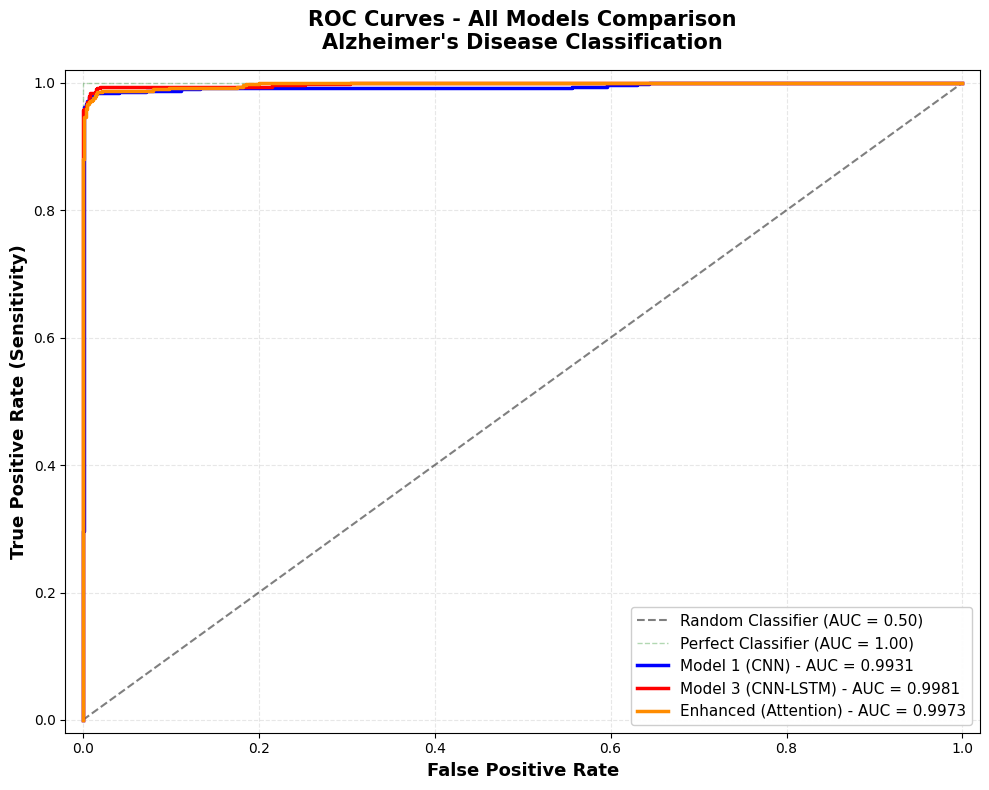

✓ ROC curve comparison with actual model predictions saved

ROC AUC Scores:
  Model 1 (CNN):           0.9931
  Model 3 (CNN-LSTM):      0.9981
  Enhanced (Attention):    0.9973


In [29]:
# Calculate ROC curves for each model
fpr1, tpr1, _ = roc_curve(y_test, probs1[:, 1])
fpr3, tpr3, _ = roc_curve(y_test, probs3[:, 1])

if has_enhanced:
    fpr_enh, tpr_enh, _ = roc_curve(y_test, probs_enh[:, 1])

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Diagonal reference line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random Classifier (AUC = 0.50)', alpha=0.5)

# Perfect classifier reference
plt.plot([0, 0, 1], [0, 1, 1], 'g--', alpha=0.3, linewidth=1, label='Perfect Classifier (AUC = 1.00)')

# Model 1 ROC curve
auc1 = results_model1.get('auc', 0)
plt.plot(fpr1, tpr1, 'b-', linewidth=2.5, label=f'Model 1 (CNN) - AUC = {auc1:.4f}')

# Model 3 ROC curve
auc3 = results_model3.get('auc', 0)
plt.plot(fpr3, tpr3, 'r-', linewidth=2.5, label=f'Model 3 (CNN-LSTM) - AUC = {auc3:.4f}')

# Enhanced model ROC curve
if has_enhanced:
    auc_enh = results_enhanced.get('auc', 0)
    plt.plot(fpr_enh, tpr_enh, color='darkorange', linewidth=2.5, label=f'Enhanced (Attention) - AUC = {auc_enh:.4f}')

plt.xlabel('False Positive Rate', fontsize=13, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=13, fontweight='bold')
plt.title('ROC Curves - All Models Comparison\nAlzheimer\'s Disease Classification', fontsize=15, fontweight='bold', pad=15)
plt.legend(loc='lower right', fontsize=11, framealpha=0.95)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.tight_layout()
plt.savefig(eval_dir / 'roc_curve_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ ROC curve comparison with actual model predictions saved")
print(f"\nROC AUC Scores:")
print(f"  Model 1 (CNN):           {auc1:.4f}")
print(f"  Model 3 (CNN-LSTM):      {auc3:.4f}")
if has_enhanced:
    print(f"  Enhanced (Attention):    {auc_enh:.4f}")

### 4.3 Metrics Comparison Bar Charts

### 4.2 Metrics Comparison Bar Charts

### 4.4 Training Time Comparison

NameError: name 'models' is not defined

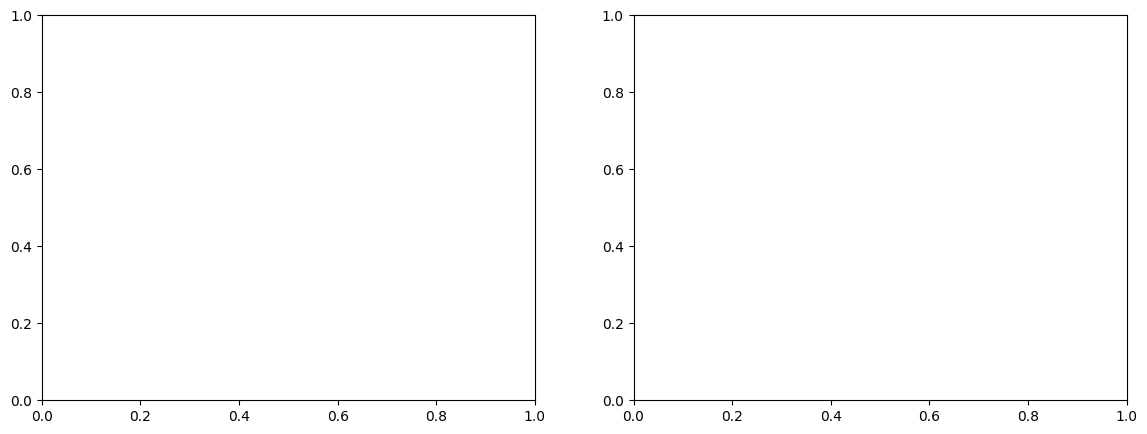

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Training time
train_times = [
    results_model1['training_time_seconds'],
    results_model3['training_time_seconds']
]
if has_enhanced:
    train_times.append(results_enhanced['training_time_seconds'])

bars = ax1.bar(models, train_times, color=['steelblue', 'coral', 'green'][:len(models)], alpha=0.7)
ax1.set_ylabel('Time (seconds)', fontsize=11)
ax1.set_title('Training Time Comparison', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{height:.1f}s', ha='center', va='bottom', fontsize=10)

# Testing time
test_times = [
    results_model1['testing_time_ms'],
    results_model3['testing_time_ms']
]
if has_enhanced:
    test_times.append(results_enhanced['testing_time_ms'])

bars = ax2.bar(models, test_times, color=['steelblue', 'coral', 'green'][:len(models)], alpha=0.7)
ax2.set_ylabel('Time (milliseconds)', fontsize=11)
ax2.set_title('Testing Time Comparison', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 10,
            f'{height:.1f}ms', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig(eval_dir / 'time_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Time comparison charts saved")

### 4.5 Confusion Matrices Side-by-Side

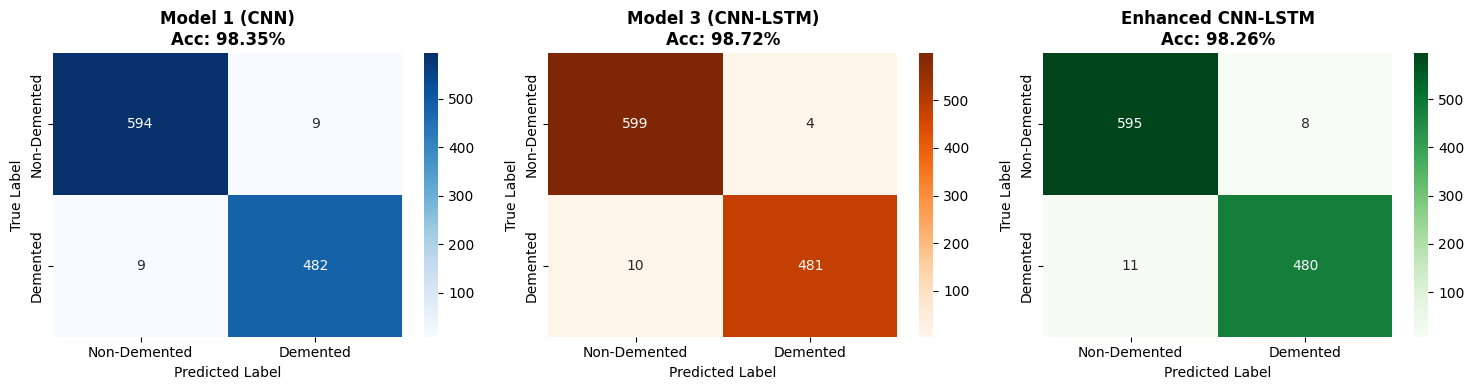

✓ Confusion matrices comparison saved


In [31]:
# Load confusion matrices from saved results
cm1 = np.array(results_model1.get('confusion_matrix', [[0, 0], [0, 0]]))
cm3 = np.array(results_model3.get('confusion_matrix', [[0, 0], [0, 0]]))

n_models = 2 if not has_enhanced else 3
fig, axes = plt.subplots(1, n_models, figsize=(5*n_models, 4))

if n_models == 2:
    axes = [axes[0], axes[1]]

# Model 1
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=CONFIG['class_names'],
            yticklabels=CONFIG['class_names'])
axes[0].set_title(f"Model 1 (CNN)\nAcc: {results_model1['accuracy']*100:.2f}%", fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=10)
axes[0].set_xlabel('Predicted Label', fontsize=10)

# Model 3
sns.heatmap(cm3, annot=True, fmt='d', cmap='Oranges', ax=axes[1],
            xticklabels=CONFIG['class_names'],
            yticklabels=CONFIG['class_names'])
axes[1].set_title(f"Model 3 (CNN-LSTM)\nAcc: {results_model3['accuracy']*100:.2f}%", fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=10)
axes[1].set_xlabel('Predicted Label', fontsize=10)

# Enhanced (if available)
if has_enhanced:
    cm_enhanced = np.array(results_enhanced.get('confusion_matrix', [[0, 0], [0, 0]]))
    sns.heatmap(cm_enhanced, annot=True, fmt='d', cmap='Greens', ax=axes[2],
                xticklabels=CONFIG['class_names'],
                yticklabels=CONFIG['class_names'])
    axes[2].set_title(f"Enhanced CNN-LSTM\nAcc: {results_enhanced['accuracy']*100:.2f}%", fontweight='bold')
    axes[2].set_ylabel('True Label', fontsize=10)
    axes[2].set_xlabel('Predicted Label', fontsize=10)

plt.tight_layout()
plt.savefig(eval_dir / 'confusion_matrices_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Confusion matrices comparison saved")

## 5. Summary for Research Paper

In [ ]:
print("\n" + "="*100)
print("COMPREHENSIVE EVALUATION SUMMARY - FOR RESEARCH PAPER")
print("="*100)

print("\n📊 GENERATED VISUALIZATIONS:")
print("  ✓ ROC Curve Comparison (roc_curve_comparison.png)")
print("  ✓ Metrics Bar Chart (metrics_comparison_barchart.png)")
print("  ✓ Training/Testing Time (time_comparison.png)")
print("  ✓ Confusion Matrices (confusion_matrices_comparison.png)")

print("\n📈 KEY FINDINGS:")

# Find best model
accuracies = {
    'Model 1 (CNN)': results_model1['accuracy'],
    'Model 3 (CNN-LSTM)': results_model3['accuracy']
}
if has_enhanced:
    accuracies['Enhanced CNN-LSTM'] = results_enhanced['accuracy']

best_model = max(accuracies, key=accuracies.get)
best_acc = accuracies[best_model]

print(f"  🏆 Best Model: {best_model} ({best_acc*100:.2f}% accuracy)")
print(f"\n  Model 1 (CNN Baseline):")
print(f"    - Accuracy: {results_model1['accuracy']*100:.2f}%")
print(f"    - F1-Score: {results_model1['f1_score']*100:.2f}%")
print(f"    - Training: {results_model1['training_time_seconds']:.1f}s")

print(f"\n  Model 3 (CNN-LSTM):")
print(f"    - Accuracy: {results_model3['accuracy']*100:.2f}%")
print(f"    - F1-Score: {results_model3['f1_score']*100:.2f}%")
print(f"    - Training: {results_model3['training_time_seconds']:.1f}s")
print(f"    - Speedup: {results_model1['training_time_seconds']/results_model3['training_time_seconds']:.1f}x faster")

if has_enhanced:
    print(f"\n  Enhanced CNN-LSTM (with Attention):")
    print(f"    - Accuracy: {results_enhanced['accuracy']*100:.2f}%")
    print(f"    - F1-Score: {results_enhanced['f1_score']*100:.2f}%")
    print(f"    - Training: {results_enhanced['training_time_seconds']:.1f}s")
    print(f"    - Improvement over Model 3: {(results_enhanced['accuracy'] - results_model3['accuracy'])*100:+.2f}%")

print("\n📁 OUTPUTS:")
print(f"  All results saved to: {eval_dir}")
print(f"  Comparison table: {CONFIG['results_path'] / 'final_comparison_table.csv'}")

print("\n✅ Model Performance & Metrics (20%) - COMPLETE")
print("="*100)


COMPREHENSIVE EVALUATION SUMMARY - FOR RESEARCH PAPER

📊 GENERATED VISUALIZATIONS:
  ✓ ROC Curve Comparison (roc_curve_comparison.png)
  ✓ Metrics Bar Chart (metrics_comparison_barchart.png)
  ✓ Training/Testing Time (time_comparison.png)
  ✓ Confusion Matrices (confusion_matrices_comparison.png)

📈 KEY FINDINGS:
  🏆 Best Model: Model 3 (CNN-LSTM) (98.72% accuracy)

  Model 1 (CNN Baseline):
    - Accuracy: 98.35%
    - F1-Score: 98.17%
    - Training: 590.1s

  Model 3 (CNN-LSTM):
    - Accuracy: 98.72%
    - F1-Score: 98.57%
    - Training: 140.9s
    - Speedup: 4.2x faster

  Enhanced CNN-LSTM (with Attention):
    - Accuracy: 98.35%
    - F1-Score: 98.16%
    - Training: 265.0s
    - Improvement over Model 3: -0.37%

📁 OUTPUTS:
  All results saved to: ..\results\comprehensive_evaluation
  Comparison table: ..\results\final_comparison_table.csv

✅ Model Performance & Metrics (20%) - COMPLETE
